https://johnfengphd.medium.com/multi-label-binary-classification-with-deep-learning-e59fcef20a5e


FineTune GPT2
https://colab.research.google.com/github/gmihaila/ml_things/blob/master/notebooks/pytorch/gpt2_finetune_classification.ipynb


### 4. Evaluation

After training, evaluate the model on a validation or test set (which should be prepared in a similar way to the training set).

Please note:
- This is a basic example and might need adjustments based on your specific dataset and requirements.
- Hyperparameter tuning (like hidden size, number of layers, learning rate, etc.) is crucial for optimal performance.
- The model assumes the embeddings are sequential data suitable for an RNN. Ensure this matches your data's nature.
- Make sure your Python environment has necessary libraries installed (e.g., `pandas`, `torch`).



Full Pytorch Basic NN Example

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/recurrent_neural_network/main.py


Choosing between a traditional RNN (Recurrent Neural Network) and an LSTM (Long Short-Term Memory) for multi-tag text classification depends on the specifics of your task and data. Here's a comparison to help you decide:

### Traditional RNN
- **Pros:**
  - Simplicity: RNNs are simpler and can be easier to train on small datasets.
  - Speed: They can be faster to train due to their simplicity.
- **Cons:**
  - Vanishing Gradient Problem: RNNs struggle with long-range dependencies due to the vanishing gradient problem, where gradients become extremely small and learning becomes ineffective for long sequences.
  - Limited Memory: RNNs have a limited ability to remember previous information in the sequence, which can be problematic for long texts or when context is critical.

### LSTM
- **Pros:**
  - Long-Term Dependencies: LSTMs are specifically designed to address the vanishing gradient problem and can capture long-range dependencies more effectively.
  - Better Memory: They have a more complex structure that includes memory cells, allowing them to remember and utilize important information throughout the sequence.
- **Cons:**
  - Complexity: LSTMs are more complex, which can lead to longer training times and the need for more data to train effectively.
  - Resource-Intensive: They typically require more computational resources than traditional RNNs.

### Multi-Tag Text Classification Context
- **Length of Text:** If your texts are long and understanding the context (i.e., the relationship between words that are far apart in the text) is crucial for classification, LSTMs or even GRUs (Gated Recurrent Units, which are similar to LSTMs but less complex) are typically more suitable.
- **Feature Extraction:** For complex feature extraction in large and diverse datasets, LSTMs are often more effective.
- **Computational Resources:** If you're limited in terms of computational resources and your dataset is relatively simple or small, a traditional RNN might suffice.

### Additional Considerations
- **Pre-trained Models:** In many modern NLP tasks, starting with a pre-trained model like BERT or other Transformers, which are excellent at capturing context in text, and then fine-tuning for your specific task can be more effective than building an RNN or LSTM from scratch.
- **Experimentation:** It’s often beneficial to experiment with different architectures to see which performs best on your specific dataset.

In conclusion, for multi-tag text classification, especially with longer texts or where context is important, LSTMs are generally a better choice over traditional RNNs. However, the best approach depends on the specifics of your task, the nature of your dataset, and available resources.

# Load Libraries

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from ast import literal_eval
import pandas as pd
import numpy as np

# Load Data

In [2]:
label_names = [
    'ARBEIT.', 'BILDUNG.', 'ENERGIE.', 'FREIZEIT.', 'GESCHICHTE.',
    'GESUNDHEIT.', 'GEWERBE.', 'INDUSTRIE.', 'JUSTIZ.', 'KULTUR.',
    'LANDWIRTSCHAFT.', 'MEDIEN UND KOMMUNIKATION.', 'MENSCH.', 'MILITÄR.',
    'PORTRÄT.', 'RELIGION.', 'SENSATION.', 'SOZIALES.',
    'STAAT UND POLITIK.', 'STRAFTAT.', 'TECHNIK.', 'UMWELT.', 'VERKEHR.',
    'VOLKSKULTUR.', 'WIRTSCHAFT.', 'WISSENSCHAFT.'
]
len(label_names)

26

In [3]:
# Load and preprocess dataset
df = pd.read_pickle('../Daten/FINAL_faro_cleaned_embeddings_balanced.pkl')#.sample(10000)   

# Convert stringified lists to actual lists
if type(df['Categories'][0])!=list:
    print('Convert Categories to list ...')
    df['Categories'] = df['Categories'].apply(literal_eval)  

if type(df['web_embeddings'][0])!=list:
    print('Convert Embeddings to list ...')
    df['web_embeddings'] = df['web_embeddings'].apply(literal_eval)     
    

# Feature list
X = df['web_embeddings'].tolist() 
# Label list 
y = df['Categories'].tolist()  

Convert Embeddings to list ...


In [4]:
df.shape

(32799, 32)

In [5]:
# First split: Separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Second split: Separate the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=True)  # 0.25 x 0.8 = 0.2


# Convert to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [6]:
X_train.shape

(19679, 1536)

In [7]:
X_val.shape

(6560, 1536)

In [8]:
X_test.shape

(6560, 1536)

In [9]:
print(round(len(X_train)/len(X), 2))
print(round(len(X_val)/len(X), 2))
print(round(len(X_test)/len(X), 2))

0.6
0.2
0.2


#### Inspect Data

In [10]:
df[['Web-Text', 'web_embeddings', 'Categories']].head(3)

,Web-Text,web_embeddings,Categories
0,"""Aus hygienischen Gründen"": 125 Jahre Frauenba...","[0.004233815241605043, 0.009712301194667816, 0...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,"""Better Shelter"" nicht feuerfest Die Stadt Zür...","[0.019185777753591537, 0.0019123187521472573, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,"""Hotel des Jahres"" 2009 GaultMillau Schweiz kü...","[0.001920992392115295, 0.017473137006163597, 0...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
len(X_train)

19679

In [12]:
len(y_train)

19679

# Define and Load PyTorch dataset

In [13]:
class MyDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        return torch.tensor(self.embeddings[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)

# DataLoader for batching operations
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
test_dataset = MyDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Hyperparameters

In [14]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define input length (length of embedding vectors)
input_size = len(X_train[0])  # Assuming all embeddings have the same size

# Define output length (length of classes)
num_classes = len(y_train[0])  # Number of output classes

# RNN Params
hidden_size = 256  # Example size, you might want to tune this
num_layers = 1  # Number of RNN layers


#This sets the number of epochs for training. An epoch is one complete pass through the entire training dataset. 
#Training for more epochs can lead to a more accurate model but also increases the risk of overfitting.
num_epochs = 30

# Define the LSTM model

In [15]:
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.4):
#         super(LSTMModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
#         self.fc = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         # Initialize hidden state and cell state with zeros
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
#         # Forward propagate the LSTM
#         out, _ = self.lstm(x, (h0, c0))
        
#         # Decode the hidden state of the last time step
#         out = self.fc(out[:, -1, :])
#         return out
    
import torch
import torch.nn as nn

class RNNwithGPTEmbeddings(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNwithGPTEmbeddings, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.rnn.num_layers, x.size(0), self.rnn.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [16]:
# Initialize the model, loss function, and optimizer
import torch.optim as optim

#model = RNNModel(input_size, hidden_size, num_layers, num_classes).to(device)
model = RNNwithGPTEmbeddings(input_size, hidden_size, num_layers, num_classes).to(device)

criterion = nn.BCEWithLogitsLoss()  # For binary/multi-label classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, min_lr=1e-6)
# Learning Rate Scheduler: Added ReduceLROnPlateau to dynamically adjust the learning rate based on validation loss.

### Understand the RNN Architecture

#### Describing the model

In [17]:
model

RNNwithGPTEmbeddings(
  (rnn): RNN(1536, 256, batch_first=True)
  (fc): Linear(in_features=256, out_features=26, bias=True)
)

The Nneural network model  consists of two primary components: 

1. **an RNN (Recurrent Neural Network) layer**: 
    - The RNN processes the input sequence, passing information through the hidden states. The stacked nature (two layers) allows for a more complex understanding of the data.
    - Each input to the RNN has 1536 features
    - The RNN has hidden states with 128 features
    - the RNN has 2 stacked layers. Stacking RNN layers can help the model to learn more complex patterns
    - batchfirst: tensor format should be (batch_size, seq_length, features)
    


2. **a fully connected linear layer**: After the RNN has processed the sequence, the final hidden state is passed to the fully connected linear layer. This layer then outputs a vector of size 27, which can be further processed or used as is, depending on the application (like a classification output).
    - 128 means that the the input to this layer is the final hidden state of the RNN.
    - 27 is the the output size of the linear layer
    - Adding a bias term allows the layer to better fit the data.

Model Architecture: The RNN model uses pre-trained GPT embeddings with a simple RNN layer followed by a fully connected layer for classification.

Interpretation of the Model Architecture
RNN Layer:

RNN(1536, 256, batch_first=True): This indicates an RNN layer where:
input_size=1536: The size of each input feature vector, which matches the dimensionality of the pre-trained GPT embeddings.
hidden_size=256: The size of the hidden state, which is the number of features in the hidden state output.
batch_first=True: This means the input and output tensors are provided as (batch, sequence, feature).
Fully Connected (fc) Layer:

Linear(in_features=256, out_features=26, bias=True): This indicates a fully connected layer where:
in_features=256: The number of input features to the layer, which matches the hidden size of the RNN.
out_features=26: The number of output features, which likely corresponds to the number of classes you are predicting.
bias=True: This indicates that a bias term is included in the linear transformation.

In [18]:
params = list(model.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

6
torch.Size([256, 1536])


`torch.nn` only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

In [19]:
# Create first batch
embedding_example, label_example = next(iter(train_loader))
embedding_example.shape

torch.Size([64, 1536])

In [20]:
embedding_example = embedding_example.unsqueeze(1).to(device)
embedding_example.shape

torch.Size([64, 1, 1536])

In [21]:
label_example = label_example.float().to(device)

In [22]:
# Predict first batch
pred = model(embedding_example)
pred.shape

torch.Size([64, 26])

In [23]:
torch.sigmoid(pred) 

tensor([[0.5253, 0.5048, 0.4946,  ..., 0.4977, 0.5136, 0.4950],
        [0.5240, 0.5053, 0.4977,  ..., 0.4969, 0.5097, 0.4996],
        [0.5301, 0.5073, 0.4945,  ..., 0.4948, 0.5132, 0.4994],
        ...,
        [0.5236, 0.5052, 0.4967,  ..., 0.4985, 0.5092, 0.4990],
        [0.5252, 0.5078, 0.4979,  ..., 0.4969, 0.5150, 0.4967],
        [0.5216, 0.5022, 0.4972,  ..., 0.4940, 0.5119, 0.5021]],
       grad_fn=<SigmoidBackward0>)

In [24]:
loss = criterion(pred, label_example)
loss

tensor(0.6973, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

## Training and Validation Loops

In [25]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

def train_model(training_loader, model, optimizer, criterion, device, threshold=0.5):
    total_train_correct = []
    total_train_samples = 0
    total_train_loss = 0
    model.train()  # Set model to training mode

    loop = tqdm(enumerate(training_loader), total=len(training_loader), leave=True, colour='steelblue')
    for batch_idx, (embeddings, labels) in loop:
        embeddings = embeddings.unsqueeze(1).to(device)
        labels = labels.float().to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)
        loss = criterion(outputs, labels)
        total_train_loss += loss.item() * labels.size(0)
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        predicted_probs = torch.sigmoid(outputs).cpu().detach().numpy()
        predicted_acc = (predicted_probs > threshold).astype(int)
        targets = labels.cpu().detach().numpy()
        correct = (predicted_acc == targets).astype(float).mean() * 100
        total_train_correct.append(correct)
        total_train_samples += labels.size(0)

        loop.set_description(f'Epoch [{batch_idx}/{len(training_loader)}]')
        loop.set_postfix(loss=loss.item())

    train_acc = np.mean(total_train_correct)
    avg_train_loss = total_train_loss / total_train_samples
    return model, train_acc, avg_train_loss



In [26]:
def eval_model(validation_loader, model, criterion, device, threshold=0.5):
    total_val_correct = []
    total_val_samples = 0
    total_val_loss = 0
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        loop = tqdm(enumerate(validation_loader), total=len(validation_loader), leave=True, colour='skyblue')
        for batch_idx, (embeddings, labels) in loop:
            embeddings = embeddings.unsqueeze(1).to(device)
            labels = labels.float().to(device)

            val_output = model(embeddings)
            val_loss = criterion(val_output, labels)
            total_val_loss += val_loss.item() * labels.size(0)

            predicted_probs_val = torch.sigmoid(val_output).cpu().detach().numpy()
            predicted_acc_val = (predicted_probs_val > threshold).astype(int)
            targets = labels.cpu().detach().numpy()
            correct = (predicted_acc_val == targets).astype(float).mean() * 100
            total_val_correct.append(correct)
            total_val_samples += labels.size(0)

            loop.set_description(f'Eval [{batch_idx}/{len(validation_loader)}]')
            loop.set_postfix(loss=val_loss.item())

    val_acc = np.mean(total_val_correct)
    avg_val_loss = total_val_loss / total_val_samples
    return val_acc, avg_val_loss


The step `loss.backward()` in the training loop of a neural network is crucial for understanding how neural networks learn. This is the step where the magic of backpropagation and gradient computation happens. Let's delve into it:

### Understanding Gradients and Backpropagation
1. **Gradients**: In the context of neural networks, a gradient is a partial derivative. It tells us how much a slight change in the model's parameters (weights and biases) will affect the change in the loss function.

2. **Backpropagation**: This is an algorithm used for efficiently computing the gradients of the loss function with respect to all the weights in the network. It works by applying the chain rule of calculus at each node of the network's computational graph in reverse order – from the output layer back to the input layer.

### How `loss.backward()` Works
1. **Computational Graph Creation**: When a forward pass is made through the network (i.e., when `model(embeddings)` is called), PyTorch builds a computational graph under the hood. Nodes in this graph are tensors, and edges are functions that produce output tensors from input tensors (like addition, multiplication, convolution operations, etc.).

2. **Backpropagation of Error**: When `loss.backward()` is called, PyTorch travels back through this computational graph. It computes the gradient of the loss with respect to each tensor (which has `requires_grad=True`) in the graph.

3. **Storing Gradients**: The computed gradients are stored in the `.grad` attribute of each tensor (typically weights and biases of the model). These gradients represent the rate of change of the loss function with respect to the corresponding tensor.

### Significance of Gradient Computation
1. **Direction and Magnitude of Parameter Updates**: The gradients point in the direction in which the loss function is increasing most rapidly. By adjusting the parameters in the opposite direction of the gradient, the loss can be minimized.

2. **Learning Rate**: The magnitude of the parameter updates is determined by the learning rate. A higher learning rate means the model parameters will change more in each training step, while a lower learning rate results in smaller changes.

3. **Convergence to Minima**: Ideally, over several epochs, this process will lead the loss to converge to a local minimum (or, in the best case, the global minimum), which means the model has learned to perform the task effectively.

In summary, `loss.backward()` is the step where the model figures out how each of its parameters needs to be adjusted to minimize the loss, making it a cornerstone of neural network training.

# Train the Model

In [84]:
from collections import defaultdict



# Initialize the history dictionary
history = defaultdict(list)
best_accuracy = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training and evaluation loop
for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}/{num_epochs}')
    model, train_acc, train_loss = train_model(train_loader, model, optimizer, criterion, device)
    val_acc, val_loss = eval_model(val_dataloader, model, criterion, device)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    torch.save(model.state_dict(), f"./models/FINAL_RNN_model_state_{str(epoch)}.bin")

    # Save the best model
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), "./models/FINAL_RNN_model_state_best.bin")
        best_accuracy = val_acc


Epoch 1/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:00<00:00, 138.74it/s, loss=0.224]


train_loss=0.2601, val_loss=0.2043 train_acc=91.9694, val_acc=92.7488
Epoch 2/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 98.09it/s, loss=0.136]


train_loss=0.1805, val_loss=0.1637 train_acc=93.3407, val_acc=93.9472
Epoch 3/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 99.74it/s, loss=0.146]


train_loss=0.1545, val_loss=0.1514 train_acc=94.2440, val_acc=94.4303
Epoch 4/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 96.13it/s, loss=0.172]


train_loss=0.1445, val_loss=0.1455 train_acc=94.6341, val_acc=94.6188
Epoch 5/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 95.06it/s, loss=0.168]


train_loss=0.1392, val_loss=0.1432 train_acc=94.8577, val_acc=94.7075
Epoch 6/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 99.27it/s, loss=0.113]


train_loss=0.1355, val_loss=0.1410 train_acc=94.9754, val_acc=94.8154
Epoch 7/30


Eval [102/103]: 100%|█████████████████████████████████████████████████████| 103/103 [00:01<00:00, 89.39it/s, loss=0.14]


train_loss=0.1329, val_loss=0.1401 train_acc=95.0735, val_acc=94.8516
Epoch 8/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 93.65it/s, loss=0.168]


train_loss=0.1308, val_loss=0.1397 train_acc=95.1695, val_acc=94.8848
Epoch 9/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 69.45it/s, loss=0.162]


train_loss=0.1292, val_loss=0.1385 train_acc=95.2082, val_acc=94.9333
Epoch 10/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 91.87it/s, loss=0.142]


train_loss=0.1277, val_loss=0.1392 train_acc=95.2636, val_acc=94.9233
Epoch 11/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:00<00:00, 104.44it/s, loss=0.148]


train_loss=0.1262, val_loss=0.1389 train_acc=95.3366, val_acc=94.9292
Epoch 12/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:00<00:00, 104.45it/s, loss=0.121]


train_loss=0.1251, val_loss=0.1386 train_acc=95.3568, val_acc=94.9438
Epoch 13/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 90.70it/s, loss=0.113]


train_loss=0.1240, val_loss=0.1390 train_acc=95.4125, val_acc=94.9473
Epoch 14/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:00<00:00, 109.90it/s, loss=0.127]


train_loss=0.1231, val_loss=0.1393 train_acc=95.4307, val_acc=94.9368
Epoch 15/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:00<00:00, 106.48it/s, loss=0.115]


train_loss=0.1221, val_loss=0.1394 train_acc=95.4419, val_acc=94.9379
Epoch 16/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 82.35it/s, loss=0.121]


train_loss=0.1212, val_loss=0.1392 train_acc=95.5037, val_acc=94.9426
Epoch 17/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:00<00:00, 112.87it/s, loss=0.152]


train_loss=0.1204, val_loss=0.1393 train_acc=95.5352, val_acc=94.9589
Epoch 18/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 94.75it/s, loss=0.128]


train_loss=0.1197, val_loss=0.1400 train_acc=95.5587, val_acc=94.9467
Epoch 19/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 83.26it/s, loss=0.148]


train_loss=0.1189, val_loss=0.1396 train_acc=95.5834, val_acc=94.9443
Epoch 20/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 98.67it/s, loss=0.128]


train_loss=0.1182, val_loss=0.1398 train_acc=95.6095, val_acc=94.9408
Epoch 21/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 90.18it/s, loss=0.143]


train_loss=0.1176, val_loss=0.1397 train_acc=95.6393, val_acc=94.9589
Epoch 22/30


Eval [102/103]: 100%|██████████████████████████████████████████████████████| 103/103 [00:01<00:00, 95.52it/s, loss=0.2]


train_loss=0.1170, val_loss=0.1410 train_acc=95.6556, val_acc=94.8947
Epoch 23/30


Eval [102/103]: 100%|█████████████████████████████████████████████████████| 103/103 [00:01<00:00, 92.48it/s, loss=0.15]


train_loss=0.1163, val_loss=0.1412 train_acc=95.6909, val_acc=94.9490
Epoch 24/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 96.36it/s, loss=0.164]


train_loss=0.1158, val_loss=0.1413 train_acc=95.7077, val_acc=94.9257
Epoch 25/30


Eval [102/103]: 100%|███████████████████████████████████████████████████| 103/103 [00:01<00:00, 100.18it/s, loss=0.126]


train_loss=0.1153, val_loss=0.1413 train_acc=95.7182, val_acc=94.9484
Epoch 26/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 87.85it/s, loss=0.127]


train_loss=0.1147, val_loss=0.1413 train_acc=95.7395, val_acc=94.9379
Epoch 27/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 98.39it/s, loss=0.135]


train_loss=0.1142, val_loss=0.1424 train_acc=95.7718, val_acc=94.8848
Epoch 28/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 97.75it/s, loss=0.149]


train_loss=0.1137, val_loss=0.1423 train_acc=95.7942, val_acc=94.9076
Epoch 29/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 59.75it/s, loss=0.146]


train_loss=0.1132, val_loss=0.1420 train_acc=95.8265, val_acc=94.9192
Epoch 30/30


Eval [102/103]: 100%|████████████████████████████████████████████████████| 103/103 [00:01<00:00, 99.34it/s, loss=0.125]


train_loss=0.1128, val_loss=0.1424 train_acc=95.8229, val_acc=94.9052


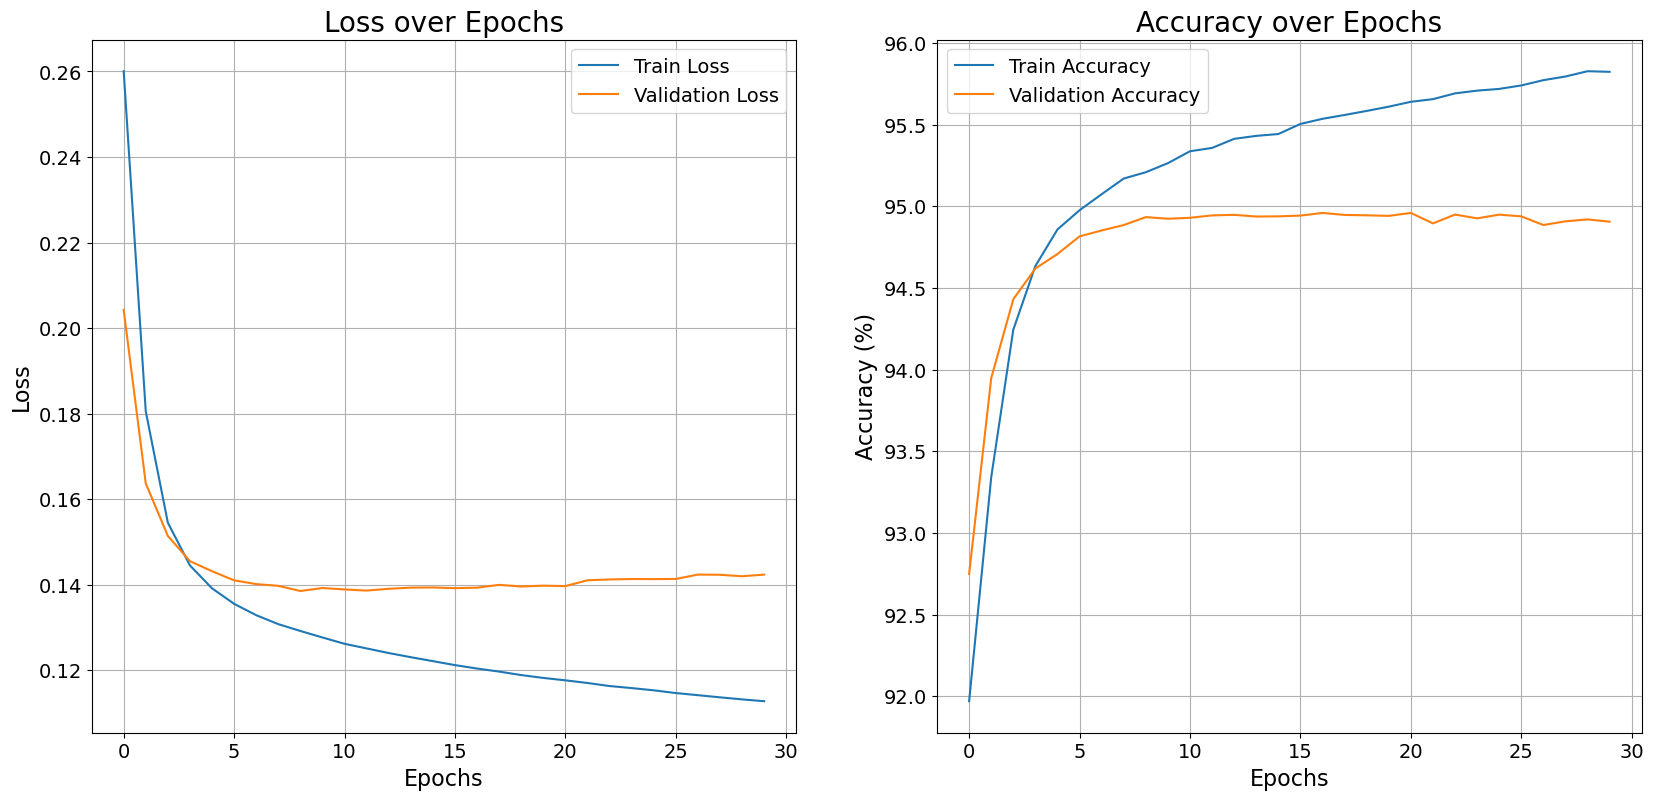

In [85]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.rcParams["figure.figsize"] = (20, 9)  # Width is doubled for two plots

# Common text size for all plots
title_size = 20
label_size = 16
legend_size = 14
tick_size = 14

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)

# Plot Loss
axs[0].plot(history['train_loss'], label='Train Loss')
axs[0].plot(history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss over Epochs', fontsize=title_size)
axs[0].set_ylabel('Loss', fontsize=label_size)
axs[0].set_xlabel('Epochs', fontsize=label_size)
axs[0].legend(fontsize=legend_size)
axs[0].grid()
axs[0].tick_params(axis='both', which='major', labelsize=tick_size)

# Plot Accuracy
axs[1].plot(history['train_acc'], label='Train Accuracy')
axs[1].plot(history['val_acc'], label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs', fontsize=title_size)
axs[1].set_ylabel('Accuracy (%)', fontsize=label_size)
axs[1].set_xlabel('Epochs', fontsize=label_size)
axs[1].legend(fontsize=legend_size)
axs[1].grid()
axs[1].tick_params(axis='both', which='major', labelsize=tick_size)

# Display the plot
plt.show()

Around Epoch 5 to 10: This range appears to be the sweet spot where the validation performance is optimal. Training further leads to overfitting without significant gains in validation accuracy.

## Evaluate the model using the test data

In [27]:
def get_predictions(model, data_loader, device, threshold=0.5):
    """
    Apply the model on test data and return predictions, prediction probabilities, and target values.
    
    Outputs:
      titles - List of titles
      predictions - Tensor of binary predictions
      prediction_probs - Tensor of prediction probabilities
      target_values - Tensor of actual target values
    """
    model.eval()  # Set the model to evaluation mode

    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():  # Disable gradient computation
        for embeddings, labels in data_loader:
            embeddings = embeddings.unsqueeze(1).to(device)
            labels = labels.float().to(device)

            outputs = model(embeddings)
            outputs = torch.sigmoid(outputs).detach().cpu()  # Apply sigmoid to get probabilities
            preds = (outputs > threshold).float()  # Apply threshold to get binary predictions
            labels = labels.detach().cpu()

            predictions.extend(preds)
            prediction_probs.extend(outputs)
            target_values.extend(labels)

    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)

    return predictions, prediction_probs, target_values

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loading pretrained model (best model)
model_test = RNNwithGPTEmbeddings(input_size, hidden_size, num_layers, num_classes).to(device)

# Load state dict
model_name_ = "./models/FINAL_RNN_model_state_5.bin"
model_test.load_state_dict(torch.load(model_name_, map_location=device))

# Set model to evaluation mode
model_test.eval()

# Ensure the model is on the right device
model_test.to(device)

RNNwithGPTEmbeddings(
  (rnn): RNN(1536, 256, batch_first=True)
  (fc): Linear(in_features=256, out_features=26, bias=True)
)

In [69]:
predictions, prediction_probs, target_values = get_predictions(model_test, test_loader, device, threshold=0.5)

In [70]:
def hamming_accuracy(actuals, predictions):
    return (actuals == predictions).mean()

# Assuming actuals and predictions are numpy arrays of shape (n_samples, 27)
hamming_acc = hamming_accuracy(np.array(target_values), np.array(predictions))
print(f"Hamming Accuracy: {hamming_acc * 100:.2f}%")

Hamming Accuracy: 94.67%


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example to convert your list of arrays into a single matrix
actuals_matrix = np.vstack(target_values)  # Do the same for predictions if necessary

# Assuming 'predictions' is already in a similar format or adjust accordingly
predictions_matrix = np.vstack(predictions)

print("Label-Accuracy:")
for i in range(actuals_matrix.shape[1]):  # Assuming actuals and predictions are numpy arrays
    label_accuracy = accuracy_score(actuals_matrix[:, i], predictions_matrix[:, i])
    
    print(f'{label_names[i]}: {round(label_accuracy, 3)}')


Label-Accuracy:
ARBEIT.: 0.958
BILDUNG.: 0.974
ENERGIE.: 0.984
FREIZEIT.: 0.946
GESCHICHTE.: 0.967
GESUNDHEIT.: 0.952
GEWERBE.: 0.943
INDUSTRIE.: 0.956
JUSTIZ.: 0.945
KULTUR.: 0.935
LANDWIRTSCHAFT.: 0.972
MEDIEN UND KOMMUNIKATION.: 0.945
MENSCH.: 0.901
MILITÄR.: 0.968
PORTRÄT.: 0.92
RELIGION.: 0.974
SENSATION.: 0.931
SOZIALES.: 0.924
STAAT UND POLITIK.: 0.882
STRAFTAT.: 0.938
TECHNIK.: 0.966
UMWELT.: 0.932
VERKEHR.: 0.959
VOLKSKULTUR.: 0.971
WIRTSCHAFT.: 0.919
WISSENSCHAFT.: 0.952


### Precision-Recall Plot

In [36]:
from sklearn.metrics import average_precision_score, precision_recall_curve, PrecisionRecallDisplay, precision_recall_curve

predictions, prediction_probs, target_values = get_predictions(model_test, test_loader, device, threshold=0.5)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(target_values[0])):
    precision[i], recall[i], _ = precision_recall_curve(target_values[:, i], prediction_probs[:, i])
    average_precision[i] = average_precision_score(target_values[:, i], prediction_probs[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    target_values.ravel(), prediction_probs.ravel()
)
average_precision["micro"] = average_precision_score(target_values, prediction_probs, average="micro")

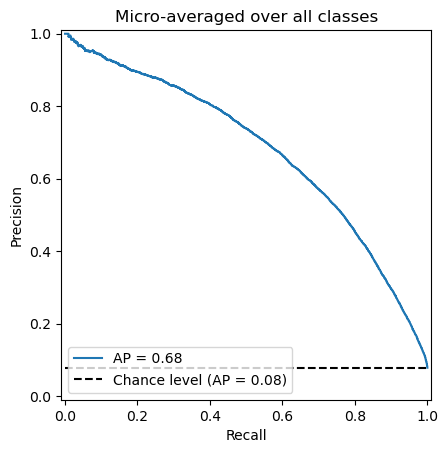

In [63]:
from collections import Counter
import matplotlib.pyplot as plt

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
    prevalence_pos_label=Counter(np.array(target_values).ravel())[1] / np.array(target_values).size,
)
display.plot(plot_chance_level=True)
_ = display.ax_.set_title("Micro-averaged over all classes")

plt.show()

In [64]:
Counter(np.array(target_values).ravel())[1] / np.array(target_values).size

0.07838883677298311

In [62]:
 np.array(target_values).size

170560

AP = Average Precision (micro-average method)
Chance Level (AP) = Precision based on random data (overall sum of positives / overall label count (samples x 26))

The classifier is performing well with a good balance between precision and recall.
The performance is significantly above the chance level, indicating that the classifier is effective at distinguishing between classes.
The micro-averaged PR curve gives a comprehensive view of the model’s performance across all classes, making it a valuable tool for evaluating the effectiveness of the classifier in a multi-class or multi-label context.

In the context of machine learning and classification tasks, the "chance level" refers to the performance that a classifier would achieve if it were making random predictions, without any knowledge about the data. It's a baseline measure used to assess the effectiveness of a classifier.

Multilabel Classification:
In multilabel classification, the chance level might be calculated based on the average label frequency or other methods depending on the specific dataset characteristics.

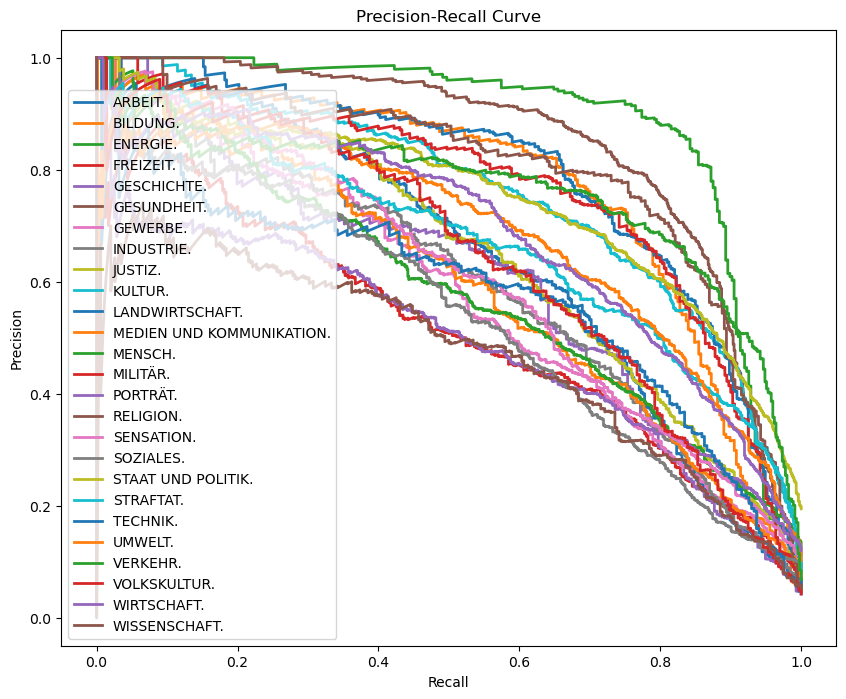

In [65]:
import numpy as np
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt




from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import average_precision_score


predictions, prediction_probs, target_values = get_predictions(model_test, test_loader, device, threshold=0.5)

# Number of classes
n_classes = target_values.shape[1]

# Initialize dictionaries
recall = {}
precision = {}

# Loop through each class and compute precision-recall
for i in range(n_classes):
    precision[i], recall[i], thresholds = precision_recall_curve(target_values[:, i], prediction_probs[:, i])
    
# If you need to plot the precision-recall curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=label_names[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

## F1 (and other scores) per Class

|                 |          Actual Positive (P) |          Actual Negative (N) |
|-----------------|------------------------------|------------------------------|
| Predicted Positive (P) | True Positive (TP)         | False Positive (FP)          |
| Predicted Negative (N) | False Negative (FN)        | True Negative (TN)   



Precision (TP / (TP + FP))
- Measures the accuracy of positive predictions.
- Defined as the ratio of true positives to the sum of true and false positives.
- Indicates the proportion of positive identifications that were actually correct.
- High precision implies a low false positive rate.

Recall (Sensitivity) (TP / (TP + FN))
- Measures the ability of a model to identify all relevant instances.
- Defined as the ratio of true positives to the sum of true positives and false negatives.
- Indicates the proportion of actual positives that were correctly identified.
- Critical in situations where missing a positive instance (e.g., failing to diagnose a sick patient) is more detrimental than - falsely identifying negative instances as positive.

F1 Score
- Harmonic mean of precision and recall.
- Combines precision and recall into a single metric by taking their harmonic mean.
- Particularly useful when you need a balance between precision and recall and there is an uneven class distribution.
- High F1 score indicates a robust model with good precision and recall balance.


In [67]:
from sklearn.metrics import classification_report

report = classification_report(target_values, predictions, target_names=label_names)
print(report)

                           precision    recall  f1-score   support

                  ARBEIT.       0.78      0.42      0.54       396
                 BILDUNG.       0.83      0.61      0.70       337
                 ENERGIE.       0.92      0.74      0.82       336
                FREIZEIT.       0.63      0.34      0.44       414
              GESCHICHTE.       0.70      0.39      0.50       276
              GESUNDHEIT.       0.88      0.67      0.76       735
                 GEWERBE.       0.71      0.40      0.51       489
               INDUSTRIE.       0.76      0.33      0.46       377
                  JUSTIZ.       0.72      0.48      0.57       506
                  KULTUR.       0.79      0.54      0.64       706
          LANDWIRTSCHAFT.       0.85      0.62      0.72       373
MEDIEN UND KOMMUNIKATION.       0.71      0.41      0.52       475
                  MENSCH.       0.68      0.39      0.49       815
                 MILITÄR.       0.82      0.54      0.65     

C:\Users\giovamau\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***Macro average**: This is simply the average of a metric — precision, recall or f1-score — over all classes.

**Micro average**: The micro-average of a metric is calculated by considering all the TP, TN, FP and FN for each class, adding them up and then using those to compute the metric’s micro-average

**Weighted average**: This is simply the average of the metric values for individual classes weighted by the support of that class.

**Samples average**: Here, we compute metrics for each sample and then average them. In our example, we have three samples.

https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea


Some common scenarios
These are some scenarios that are likely to occur when evaluating multi-label classifiers.

**Having duplicates in your test data**
Real-world test data can have duplicates. If you don’t remove them, how would they affect the performance of your model? The aggregate metrics generally used when evaluating classification models are forms of average. So the effect of duplicates comes down to whether these duplicated data points are correctly classified or not.

**Your model predicts only some of the expected labels**
When your model doesn’t predict every expected label but also doesn’t predict extra labels, you’ll see higher precision values along with lower recall values.

Whatever your model predicts, it's doing it correctly (high precision) but it's not always predicting what’s expected (low recall).

**Your model predicts more labels than are expected**
This is the opposite of the previous scenario. Since your model is predicting extra labels, those extra classes would end up with lower precision (since those predictions aren’t expected). At the same time, your model is predicting all the expected labels too, so you’d end up with high recall scores.

**High precision — High recall**
This is the ideal scenario, where both precision and recall are high. Intuitively, this means that when our model predicts a particular label, that’s most often an expected label, and when a particular label is expected, our model generally gets it right.

**High Precision — Low Recall**
This means that our model is really selective in its predictions. When a data point is particularly difficult to label, our model chooses to not take the risk of predicting an incorrect label. This means that when our model predicts a particular label, it is more often than not correct (high precision), but the same isn’t true the other way around (low recall).

**Low Precision — High Recall**
In this case, our model is pretty lenient in its predictions. It is more likely to assign a label to a data point even if it’s not completely sure. And because of this, our model is likely to assign incorrect labels to certain data points, leading to a drop in precision.

**Thresholding to improve results**
Most algorithms use a threshold of 0.5. This means that predictions with confidence greater than 0.5 are considered to belong to the positive class, while less confident predictions aren’t considered.

How does this relate to the entire precision-recall discussion? Well, think about what would happen if you modified this threshold.

If you increase your threshold, you’re getting more stringent about what your model predicts. Now that only predictions with high confidence are assigned, your model is more likely to be right when it predicts a class, leading to high precision. At the same time, your model may miss expected labels that had low confidence, leading to a lower recall.

On the other hand, reducing your model’s classification threshold would mean that your model is lenient about its predictions. That would mean that your model is more likely to predict expected labels though they may have been low-confidence decisions, meaning that you’ll have a high recall. But now that your model is less strict, it’s likely that the labels it assigns aren’t part of the expected labels, leading to lower precision.

Balancing recall and precision
As we just saw, there’s a tradeoff between precision and recall. If you make your model highly selective, you end up with better precision, but risk facing a drop in recall, and vice versa.

Between these two metrics, what’s more important depends on the problem you’re trying to solve.

Medical diagnostic tools, like skin cancer detection systems, can’t afford to label a cancerous case as a non-cancerous one. Here, you would want to minimize the false negatives. This means that you’re trying to maximize recall.

Likewise, if you consider a recommendation system, you’re more concerned with recommending something that customers may not be interested in than with not recommending something they would be interested in. Here, fall negatives aren’t an issue — the goal is to make the content as relevant as possible. Since we’re reducing false positives here, we’re focusing on precision, rather than recall.

## Validating Results in Multi-Label Use-Case

*However, it is not obvious how to provide confidence in the multi-label context and relating to a particular accuracy metric, and nor is it clear how to provide a confidence which correlates well with the expected accuracy, which would be most valuable in real-world decision making.*

    Park, L. A., & Read, J. (2022). Estimating Multi-label Accuracy using Labelset Distributions. arXiv preprint arXiv:2209.04163.
    
    
   
Expected accuracy provides the practitioner with a measurement of the estimated accuracy with respect to the evaluation
metric. We hypothesised that expected accuracy of a multi-label prediction is a function of the categorical distribution over the powerset of the labels conditioned on the given observation.

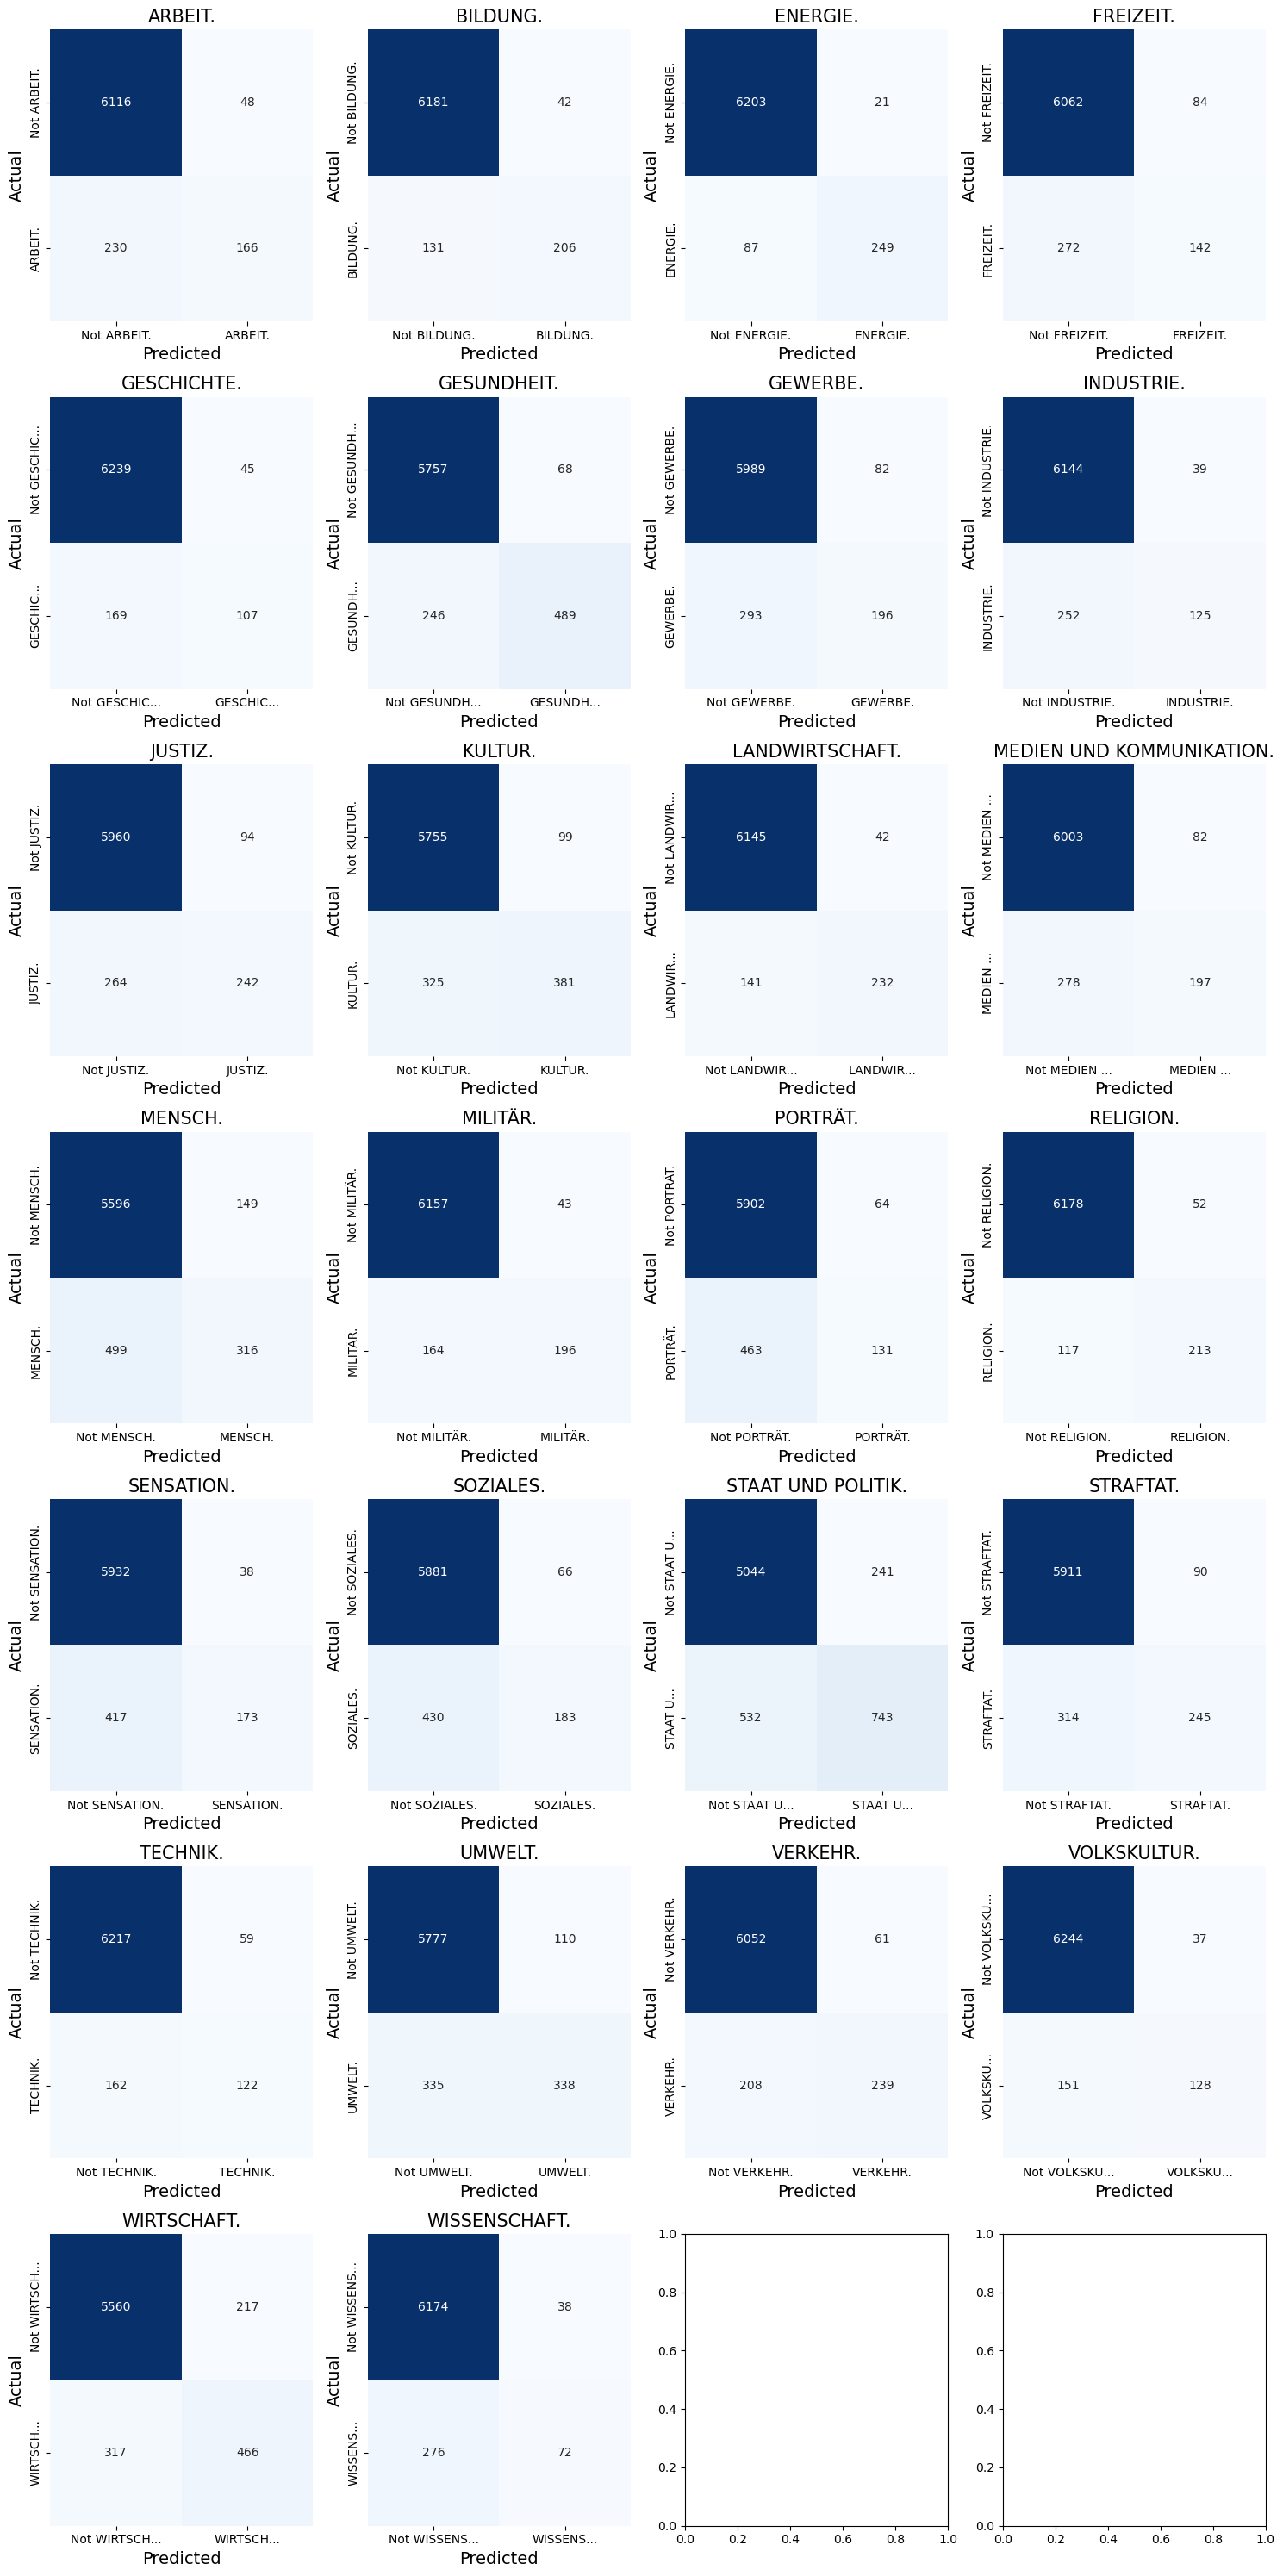

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(ax, cm, labels, title='Confusion Matrix'):
    sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels), annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(title, fontsize=15)
    ax.set_ylabel('Actual', fontsize=14)
    ax.set_xlabel('Predicted', fontsize=14)

# Set up the figure and subplots
fig, axs = plt.subplots(7, 4, figsize=(15, 30))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Compute and plot confusion matrix for each label
for i, label in enumerate(label_names[:26]):  # Ensure only 26 labels are processed for the 13x2 grid
    row, col = divmod(i, 4)
    try:
        cm = confusion_matrix(target_values[:, i], predictions[:, i])
        if len(label)<=10:
            plot_confusion_matrix(axs[row, col], cm, labels=[f'Not {label}', f'{label}'], title=label)
        else:
            plot_confusion_matrix(axs[row, col], cm, labels=[f'Not {label[0:7]}...', f'{label[0:7]}...'], title=label)
    except:
        next
# Adjust layout and save the figure to a file
plt.tight_layout()
plt.savefig("RNN_Confusion_Matrix.png")
plt.show()

# Measuring Model Performance

|                 |          Actual Positive (P) |          Actual Negative (N) |
|-----------------|------------------------------|------------------------------|
| Predicted Positive (P) | True Positive (TP)         | False Positive (FP)          |
| Predicted Negative (N) | False Negative (FN)        | True Negative (TN)   


Accuracy (TP+TN /alles)
- Measures the overall correctness of the model.
- Calculated as the ratio of correct predictions (both true positives and true negatives) to the total number of cases examined.
- Useful when the classes are well balanced but can be misleading when class distributions are skewed.


In [94]:
actuals = target_values

In [95]:
a = np.array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
b = np.array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

(a == b).mean()

0.9230769230769231

In [96]:
print()
print(f'Actual Labels:    [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]')
print(f'Predicted Labels: [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]')
print('Matching Values:  [x , x , x , x , x , x , x , x , x , x ,   ,   , x , x , x , x , x , x , x , x , x , x , x , x , x , x ]' )
print()
print('Matching Values Count = x = 24')
print('Hamming Accuracy = (24/26) = 0.923')


Actual Labels:    [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
Predicted Labels: [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
Matching Values:  [x , x , x , x , x , x , x , x , x , x ,   ,   , x , x , x , x , x , x , x , x , x , x , x , x , x , x ]

Matching Values Count = x = 24
Hamming Accuracy = (24/26) = 0.923


|                 |          Actual Positive (P) |          Actual Negative (N) |
|-----------------|------------------------------|------------------------------|
| Predicted Positive (P) | TP = 1                | FP = 0                       |
| Predicted Negative (N) | FN = 2                | TN = 23



In [97]:
print('Binary Confusion Matrix Accuracy = (TP + TN) / (TP + FN + FP + TN) = 24/26 = 0.923')

Binary Confusion Matrix Accuracy = (TP + TN) / (TP + FN + FP + TN) = 24/26 = 0.923


In [287]:
len(predictions)

6560

# Model Scores

### Exact Match (Subset Accuracy)

This is the strictest metric and considers an instance correctly classified only if all its labels are exactly correct (i.e., an exact match to the true label set).

In [98]:
# Compute performance metrics
accuracy = accuracy_score(actuals, predictions)
f1 = f1_score(actuals, predictions, average='macro')  # Use 'binary' or 'weighted' depending on your case

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.23003048780487806
F1 Score: 0.567473195256441


In [99]:
from sklearn.metrics import accuracy_score

# Example of actuals and predictions with shape (n_samples, 27)
accuracy = accuracy_score(actuals, predictions)
print(f"Subset Accuracy: {accuracy * 100:.2f}%")

Subset Accuracy: 23.00%


### Jaccard Similarity (JS)
Definition:
Jaccard Similarity measures the overlap between the predicted and actual sets of labels for each instance, averaged across all instances.
For each instance, it calculates the ratio of the number of common labels (intersection) to the total number of unique labels (union) in the predicted and actual sets.

In [100]:
def jaccard_accuracy(actuals, predictions):
    # Convert boolean arrays to integer type
    actuals = actuals.astype(np.bool_)
    predictions = predictions.astype(np.bool_)
    
    # Calculate the intersection and union
    intersection = np.logical_and(actuals, predictions).sum(axis=1)
    union = np.logical_or(actuals, predictions).sum(axis=1)
    
    # Calculate the Jaccard similarity for each instance
    jaccard = intersection / union
    
    # Return the mean Jaccard similarity
    return np.mean(jaccard)

jaccard_accuracy(np.array(target_values), np.array(predictions))

0.4630288182346109

### Hamming Accuracy: Element-wise Comparison: 

Compare each element in the actual label matrix to the corresponding element in the predicted label matrix. This produces a new matrix (of the same shape) filled with True (if the prediction was correct) or False (if the prediction was incorrect).

Calculate the Mean: Compute the mean of this boolean matrix, which represents the proportion of True values over all elements. 

This mean is the Hamming Accuracy.

In [101]:
def hamming_accuracy(actuals, predictions):
    return (actuals == predictions).mean()

# Assuming actuals and predictions are numpy arrays of shape (n_samples, 27)
hamming_acc = hamming_accuracy(np.array(target_values), np.array(predictions))
print(f"Hamming Accuracy: {hamming_acc * 100:.2f}%")

Hamming Accuracy: 94.67%


## Baseline Accuracy

### Zero Vectors as a baseline

In [102]:
# Create fake data with zeros
zero_data = torch.zeros((predictions.shape[0], predictions.shape[1])).to(device)
zero_data.shape

hamming_acc_zero = hamming_accuracy(np.array(target_values), np.array(zero_data))
print(f"Hamming Accuracy Zeroes: {hamming_acc_zero * 100:.3f}%")

Hamming Accuracy Zeroes: 92.161%


In [103]:
f1_score(actuals, zero_data, average='macro')

0.0

In [104]:
# Function to randomly set 2 values per row
def set_random_values(tensor, num_values=2):
    for row in tensor:
        indices = torch.randperm(tensor.shape[1])[:num_values]  # Randomly select indices
        row[indices] = 1  # Set random values between 0 and 1
        return tensor

# Set 2 random values per row in zero_data
rand_2_values = set_random_values(zero_data)

In [105]:
hamming_acc_zero = hamming_accuracy(np.array(target_values), np.array(rand_2_values))
print(f"Hamming Accuracy Zeroes: {hamming_acc_zero * 100:.3f}%")

Hamming Accuracy Zeroes: 92.160%


In [106]:
f1_score(actuals, rand_2_values, average='macro')

0.0

### Wheighted Random Baseline

For this baseline, predict each label according to its frequency in the dataset.


Initialization of Predictions: An array of zeros is created to store the predictions for each label for all simulations and samples. This initialization is critical to hold the randomly generated predictions based on each label's distribution.

Probability Calculation: For each label, the probability distribution of its unique values is computed from the actual data. This step ensures that the random predictions reflect the actual distribution of the label values, making this method stratified rather than purely random.

Prediction Generation: Using numpy.random.choice(), predictions are generated based on the determined probabilities. This function ensures that the predictions for each label match its natural distribution in the dataset.

Accuracy Calculation: The overall accuracy for each simulation is calculated by comparing the predicted values to the actual values for all labels and samples. The use of np.expand_dims() on actuals aligns its dimensions with predictions for element-wise comparison over multiple simulations, enabling a thorough element-wise accuracy computation.

Mean Accuracy: The mean of these accuracies gives a single metric that represents the expected performance of a classifier that predicts according to the observed label distribution without considering any actual input features.
This function is particularly useful for setting a performance baseline in multi-label classification tasks. It helps determine how well a model needs to perform, surpassing what would be achieved by simply guessing based on the frequency of each label. Such a baseline is crucial for evaluating whether more complex predictive models are truly learning meaningful patterns rather than just mirroring the data distribution.


In [107]:
df['Categories'].shape

(32799,)

In [108]:
def stratified_random_baseline(actuals, num_simulations=1000):   
    # Determine the number of samples and labels from the shape of the actuals array
    num_samples, num_labels = actuals.shape
    # Initialize a predictions array with zeros, shaped to store all simulations for all samples and labels
    predictions = np.zeros((num_simulations, num_samples, num_labels), dtype=int)
    
    # Loop through each label
    # Extract the unique values and their counts for the current label across all samples
    # Calculate the probability of each unique value based on its frequency
    # Generate predictions for the current label, for all simulations and all samples, based on the calculated probabilities
    for label_idx in range(num_labels):
        label_values = actuals[:, label_idx]
        unique, counts = np.unique(label_values, return_counts=True)
        probabilities = counts / counts.sum()
        print(f'Label: {label_names[label_idx]}, Prob 0: {probabilities[0]:.3f}, Prob 1: {probabilities[1]:.3f}')
        predictions[:, :, label_idx] = np.random.choice(unique, size=(num_simulations, num_samples), p=probabilities)
    
    # Calculate the accuracy for each simulation by comparing predictions with actual values across all labels and samples
    
    # Ensure boolean comparison results in integers for mean calculation
    accuracies = (predictions == actuals).astype(float).mean(axis=(1, 2))
    
        
    return actuals, predictions, accuracies.mean()


# Convert the list actuals to a numpy array and pass it to the function
actuals_, predictions_, stratified_random_accuracy = stratified_random_baseline(np.array(actuals))
# Print the calculated stratified random baseline accuracy as a percentage
print('')
print(f"Stratified Random Baseline Accuracy: {stratified_random_accuracy * 100:.2f}%")

Label: ARBEIT., Prob 0: 0.940, Prob 1: 0.060
Label: BILDUNG., Prob 0: 0.949, Prob 1: 0.051
Label: ENERGIE., Prob 0: 0.949, Prob 1: 0.051
Label: FREIZEIT., Prob 0: 0.937, Prob 1: 0.063
Label: GESCHICHTE., Prob 0: 0.958, Prob 1: 0.042
Label: GESUNDHEIT., Prob 0: 0.888, Prob 1: 0.112
Label: GEWERBE., Prob 0: 0.925, Prob 1: 0.075
Label: INDUSTRIE., Prob 0: 0.943, Prob 1: 0.057
Label: JUSTIZ., Prob 0: 0.923, Prob 1: 0.077
Label: KULTUR., Prob 0: 0.892, Prob 1: 0.108
Label: LANDWIRTSCHAFT., Prob 0: 0.943, Prob 1: 0.057
Label: MEDIEN UND KOMMUNIKATION., Prob 0: 0.928, Prob 1: 0.072
Label: MENSCH., Prob 0: 0.876, Prob 1: 0.124
Label: MILITÄR., Prob 0: 0.945, Prob 1: 0.055
Label: PORTRÄT., Prob 0: 0.909, Prob 1: 0.091
Label: RELIGION., Prob 0: 0.950, Prob 1: 0.050
Label: SENSATION., Prob 0: 0.910, Prob 1: 0.090
Label: SOZIALES., Prob 0: 0.907, Prob 1: 0.093
Label: STAAT UND POLITIK., Prob 0: 0.806, Prob 1: 0.194
Label: STRAFTAT., Prob 0: 0.915, Prob 1: 0.085
Label: TECHNIK., Prob 0: 0.957, Prob

In [109]:
from sklearn.metrics import classification_report

report = classification_report(actuals_, predictions_[1], target_names=label_names)
print(report)

                           precision    recall  f1-score   support

                  ARBEIT.       0.06      0.06      0.06       396
                 BILDUNG.       0.05      0.05      0.05       337
                 ENERGIE.       0.03      0.03      0.03       336
                FREIZEIT.       0.08      0.07      0.08       414
              GESCHICHTE.       0.06      0.06      0.06       276
              GESUNDHEIT.       0.11      0.11      0.11       735
                 GEWERBE.       0.09      0.09      0.09       489
               INDUSTRIE.       0.05      0.04      0.04       377
                  JUSTIZ.       0.08      0.08      0.08       506
                  KULTUR.       0.12      0.12      0.12       706
          LANDWIRTSCHAFT.       0.05      0.05      0.05       373
MEDIEN UND KOMMUNIKATION.       0.09      0.09      0.09       475
                  MENSCH.       0.12      0.12      0.12       815
                 MILITÄR.       0.06      0.06      0.06     

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example to convert your list of arrays into a single matrix
actuals_matrix_ = np.vstack(actuals_)  # Do the same for predictions if necessary

# Assuming 'predictions' is already in a similar format or adjust accordingly
predictions_matrix_ = np.vstack(predictions_[1])

print("Label-Accuracy:")
for i in range(actuals_matrix_.shape[1]):  # Assuming actuals and predictions are numpy arrays
    label_accuracy = accuracy_score(actuals_matrix_[:, i], predictions_matrix_[:, i])
    
    print(f'{label_names[i]}: {round(label_accuracy, 3)}')


Label-Accuracy:
ARBEIT.: 0.889
BILDUNG.: 0.901
ENERGIE.: 0.9
FREIZEIT.: 0.886
GESCHICHTE.: 0.922
GESUNDHEIT.: 0.804
GEWERBE.: 0.863
INDUSTRIE.: 0.893
JUSTIZ.: 0.858
KULTUR.: 0.811
LANDWIRTSCHAFT.: 0.889
MEDIEN UND KOMMUNIKATION.: 0.867
MENSCH.: 0.776
MILITÄR.: 0.893
PORTRÄT.: 0.84
RELIGION.: 0.907
SENSATION.: 0.831
SOZIALES.: 0.833
STAAT UND POLITIK.: 0.688
STRAFTAT.: 0.844
TECHNIK.: 0.916
UMWELT.: 0.823
VERKEHR.: 0.873
VOLKSKULTUR.: 0.921
WIRTSCHAFT.: 0.779
WISSENSCHAFT.: 0.902


In [113]:
actuals_
len(predictions_[0])

6560

# Appendix

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example to convert your list of arrays into a single matrix
actuals_matrix = np.vstack(actuals)  # Do the same for predictions if necessary

# Assuming 'predictions' is already in a similar format or adjust accordingly
predictions_matrix = np.vstack(predictions)

print("Label-Accuracy:")
for i in range(actuals_matrix.shape[1]):  # Assuming actuals and predictions are numpy arrays
    label_accuracy = accuracy_score(actuals_matrix[:, i], predictions_matrix[:, i])
    
    print(f'{label_names[i]}: {round(label_accuracy, 3)}')




Label-Accuracy:
ARBEIT.: 0.958
BILDUNG.: 0.974
ENERGIE.: 0.984
FREIZEIT.: 0.946
GESCHICHTE.: 0.967
GESUNDHEIT.: 0.952
GEWERBE.: 0.943
INDUSTRIE.: 0.956
JUSTIZ.: 0.945
KULTUR.: 0.935
LANDWIRTSCHAFT.: 0.972
MEDIEN UND KOMMUNIKATION.: 0.945
MENSCH.: 0.901
MILITÄR.: 0.968
PORTRÄT.: 0.92
RELIGION.: 0.974
SENSATION.: 0.931
SOZIALES.: 0.924
STAAT UND POLITIK.: 0.882
STRAFTAT.: 0.938
TECHNIK.: 0.966
UMWELT.: 0.932
VERKEHR.: 0.959
VOLKSKULTUR.: 0.971
WIRTSCHAFT.: 0.919
WISSENSCHAFT.: 0.952


In [117]:
from sklearn.metrics import multilabel_confusion_matrix


# TN | FP
# FN | TP
multilabel_confusion_matrix(actuals, predictions)

array([[[6116,   48],
        [ 230,  166]],

       [[6181,   42],
        [ 131,  206]],

       [[6203,   21],
        [  87,  249]],

       [[6062,   84],
        [ 272,  142]],

       [[6239,   45],
        [ 169,  107]],

       [[5757,   68],
        [ 246,  489]],

       [[5989,   82],
        [ 293,  196]],

       [[6144,   39],
        [ 252,  125]],

       [[5960,   94],
        [ 264,  242]],

       [[5755,   99],
        [ 325,  381]],

       [[6145,   42],
        [ 141,  232]],

       [[6003,   82],
        [ 278,  197]],

       [[5596,  149],
        [ 499,  316]],

       [[6157,   43],
        [ 164,  196]],

       [[5902,   64],
        [ 463,  131]],

       [[6178,   52],
        [ 117,  213]],

       [[5932,   38],
        [ 417,  173]],

       [[5881,   66],
        [ 430,  183]],

       [[5044,  241],
        [ 532,  743]],

       [[5911,   90],
        [ 314,  245]],

       [[6217,   59],
        [ 162,  122]],

       [[5777,  110],
        [ 33

## Manually compute Accuracy for Testing

In [120]:
random_arrays_matrix = actuals_matrix_ 

result_df = pd.DataFrame()

for l in range(len(label_names)):
    count = 0
    TP_counter = 0
    TN_counter = 0
    FP_counter = 0
    FN_counter = 0


    random_TP_counter = 0
    random_TN_counter = 0
    random_FP_counter = 0
    random_FN_counter = 0

    for i in range(len(actuals_matrix[:, l])):

        # Actual
        if actuals_matrix[i, l]==1:
            count += 1

        if actuals_matrix[i, l]==1 and predictions_matrix[i, l]==1:
            TP_counter += 1

        if actuals_matrix[i, l]==0 and predictions_matrix[i, l]==0:
            TN_counter += 1

        if actuals_matrix[i, l]!=predictions_matrix[i, l]:
            if actuals_matrix[i, l] > predictions_matrix[i, l]:
                FN_counter += 1

            if actuals_matrix[i, l] < predictions_matrix[i, l]:
                FP_counter += 1

        # compared to RANDOM      

        if actuals_matrix[i, l]==1 and random_arrays_matrix[i, l]==1:
            random_TP_counter += 1

        if actuals_matrix[i, l]==0 and random_arrays_matrix[i, l]==0:
            random_TN_counter += 1

        if actuals_matrix[i, l]!=random_arrays_matrix[i, l]:
            if actuals_matrix[i, l] > random_arrays_matrix[i, l]:
                random_FN_counter += 1

            if actuals_matrix[i, l] < random_arrays_matrix[i, l]:
                random_FP_counter += 1
            
    result_df.loc[l, ['label_names']] = label_names[l]
    result_df.loc[l, ['actual_accuracy']] = (TP_counter+TN_counter)/(TP_counter+TN_counter+FP_counter+FN_counter)
    result_df.loc[l, ['random_accuracy']] = (random_TP_counter+random_TN_counter)/(random_TP_counter+random_TN_counter+random_FP_counter+random_FN_counter)
            
print(count)      
print(f'Accuracy: {(TP_counter+TN_counter)/(TP_counter+TN_counter+FP_counter+FN_counter)}')#(TP_counter+TN_counter+FP_counter+FN_counter)
print(f'Accuracy: {(random_TP_counter+random_TN_counter)/(random_TP_counter+random_TN_counter+random_FP_counter+random_FN_counter)}')#(TP_counter+TN_counter+FP_counter+FN_counter)

348
Accuracy: 0.9521341463414634
Accuracy: 1.0


In [119]:
result_df

NameError: name 'result_df' is not defined

## Research Results for similar Tasks


https://github.com/alinapetukhova/mn-ds-news-classification/blob/master/README.md
Multilabel classification results for level 1 categories.
| Embeddings model  | TF-IDF precision  | TF-IDF recall | TF-IDF f1 score  | Glove precision  | Glove recall | Glove f1 score | DistilBertTokenizer precision | DistilBertTokenizer recall| DistilBertTokenizer f1 score
| :------------ |---------------:| -----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| Multinomial NB 	| 0.802 | 0.631 | 0.649 | 0.629 | 0.499 | 0.529 | n/a   | n/a   | n/a   | 
| Logistic Regression	| 0.800 | 0.763 | 0.774 | 0.747 | 0.739 | 0.739 | n/a   | n/a   | n/a   |
| SVC classifier 	| 0.808 | 0.796 | 0.799 | 0.768 | 0.762 | 0.760 | n/a   | n/a   | n/a   |
| DistilBERTModel 	| n/a   | n/a   | n/a   | n/a   | n/a   | n/a   | 0.849 | 0.842 | 0.844 ||





Using the Tsetlin Machine to Learn Human-Interpretable Rules for High-Accuracy Text Categorization With Medical Applications - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Average-classification-results-in-percent-for-the-20-Newsgroup-dataset_tbl1_335186095 [accessed 9 Apr, 2024]


| Method                | Precision  | Recall   | F-measure |
|-----------------------|------------|----------|-----------|
| Multinomial Naïve Bayes | 82.8±0.0 | 80.0±0.0 | 79.8±0.0 |
| Logistic regression   | 83.1±0.0  | 81.7±0.0 | 81.9±0.0  |
| Decision tree         | 56.8±0.0  | 61.8±0.4 | 59.2±0.0  |
| Random forest         | 69.9±0.1  | 68.2±0.1 | 68.3±0.1  |
| kNN                   | 56.0±0.0  | 43.3±0.0 | 45.9±0.0  |
| Linear SVM            | 82.6±0.0  | 82.0±0.0 | 82.2±0.0  |
| MLP                   | 80.9±0.0  | 78.1±0.0 | 76.9±0.0  |
| LSTM                  | 80.4±0.0  | 72.6±0.1 | 76.3±0.0  |
| LSTM CNN              | 82.8±0.0  | 72.8±0.1 | 76.7±0.0  |
| Bi-LSTM               | 80.9±0.0  | 72.6±0.1 | 76.5±0.0  |
| Bi-LSTM CNN           | 81.8±0.1  | 72.3±0.3 | 76.7±0.2  |
| Tsetlin Machine       | 82.6±0.1  | 80.9±0.1 | 81.7±0.1  |

Data and Task Specifics: Depending on your specific task and the nature of your data, you might need to adjust the architecture. For instance, if you're dealing with long sequences, consider using nn.LSTM or nn.GRU instead of nn.RNN, as these can handle long-term dependencies better.